In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from matplotlib_venn import venn3, venn2
pd.options.display.max_rows = 2000

In [3]:
pd.options.display.max_colwidth = 120

In [18]:
df = pd.read_csv("out/df_filt.csv", index_col=0)
df = df[df.sum(1)!=0]  # drop empty rows
df.head()
df.shape

(14618, 18)

In [19]:
df.head()

,H1,H2,H3,H4,H5,H6,H7,H8,UC1,UC11,UC15,UC2,UC23,UC4,UC5,UC6,UC8,UC9
202956,13,5,10,7,4,6,8,2,13,0,7,8,6,12,3,0,2,8
209005,25,31,27,0,8,24,10,46,35,13,23,50,12,14,31,0,17,25
217964,6,3,2,6,0,6,4,4,0,0,0,3,1,2,0,0,1,2
248190,3,2,1,0,0,0,2,6,3,3,2,11,0,0,7,0,0,0
302579,4,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0


In [20]:
# venn where a protein cluster is selected if it is in >=1 sample per group
df['healthy'] = df[df.columns[df.columns.str.contains("H")]].sum(axis=1)
df['uc'] = df[df.columns[df.columns.str.contains("UC")]].sum(axis=1)
df.head()

,H1,H2,H3,H4,H5,H6,H7,H8,UC1,UC11,UC15,UC2,UC23,UC4,UC5,UC6,UC8,UC9,healthy,uc
202956,13,5,10,7,4,6,8,2,13,0,7,8,6,12,3,0,2,8,55,59
209005,25,31,27,0,8,24,10,46,35,13,23,50,12,14,31,0,17,25,171,220
217964,6,3,2,6,0,6,4,4,0,0,0,3,1,2,0,0,1,2,31,9
248190,3,2,1,0,0,0,2,6,3,3,2,11,0,0,7,0,0,0,14,26
302579,4,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,4,12


In [22]:
df[df.uc==0].shape

(336, 20)

In [23]:
df[df.healthy==0].shape

(632, 20)

In [24]:
healthy = set(df[df['healthy']>0].index)
uc = set(df[df['uc']>0].index)

In [25]:
locus_df = pd.read_csv("out/locus_df.csv", index_col=0)
locus_df.head(2)

,gn,gn1,human_mouse,lca,name
202956,NaN,NaN,False,716546.0,gi|115398299|ref|XP_001214741.1| NADP-specific glutamate dehydrogenase [Aspergillus terreus NIH2624]
209005,NaN,NaN,False,2759.0,gi|573989463|ref|XP_006672652.1| histone H4.1 [Cordyceps militaris CM01]


In [26]:
not_in_uc = healthy - uc
not_in_healthy = uc - healthy

In [27]:
# not_in_uc
locus_df[locus_df.index.isin(not_in_uc)]

,gn,gn1,human_mouse,lca,name
4239257,NaN,NaN,False,36834.0,gi|491353428|ref|WP_005211350.1| 50S ribosomal protein L20 [Clostridium celatum]
4754940,NaN,NaN,False,36834.0,gi|491357809|ref|WP_005215727.1| 30S ribosomal protein S20 [Clostridium celatum]
4792340,FP2_08430,FP2_08430,False,186802.0,E2ZM15|HMPREF9436_02726 bacitracin transport ATP-binding protein BcrA [Faecalibacterium cf. prausnitzii KLE1255]
6131197,"BAST_1304,BLIJ_2260,BLJ_1703,BN474_00098,BLLJ_1633,BLIF_1702,pgm,BIL_03870,BN755_00771,BLNIAS_00353,BANAN_02210",NaN,False,31953.0,gi|119025383|ref|YP_909228.1| phosphoglucomutase [Bifidobacterium adolescentis ATCC 15703]
7552733,NaN,NaN,False,NaN,MH0113_GL0098315 [gene] locus=scaffold29653_4:52:360:+ [Complete] codon-table.11
7823891,EUBELI_01598,EUBELI_01598,False,39485.0,tr|C4Z2L4|C4Z2L4_EUBE2 Uncharacterized protein OS=Eubacterium eligens (strain ATCC 27750 / VPI C15-48) GN=EUBELI_015...
7937898,rpsP,rpsP,False,216816.0,tr|D6ZY45|D6ZY45_BIFLJ 30S ribosomal protein S16 OS=Bifidobacterium longum subsp. longum (strain JDM301) GN=rpsP PE=...
7939223,rplR,rplR,False,1678.0,gi|296454854|ref|YP_003661998.1| 50S ribosomal protein L18 [Bifidobacterium longum subsp. longum JDM301]
9205056,rplI,rplI,False,1678.0,gi|479136355|ref|YP_007768155.1| LSU ribosomal protein L9P [Bifidobacterium longum subsp. longum F8]
11333292,NaN,NaN,False,1235799.0,gi|510890219|ref|WP_016223535.1| hypothetical protein [Lachnospiraceae bacterium 3-2]


In [28]:
# not_in_healthy
locus_df[locus_df.index.isin(not_in_healthy)]

,gn,gn1,human_mouse,lca,name
2006234,"TUBA8,TUBA1C,Tuba1b,TUBA3E,Tuba3a,Tuba1c,Tuba8,TUBA1B,Tuba4a,TUBA3C,TUBA1A,Tuba1a,TUBA4A",NaN,False,2759.0,tr|F5H5D3|F5H5D3_HUMAN Tubulin alpha-1C chain OS=Homo sapiens GN=TUBA1C PE=1 SV=1
2054795,"HSPA5,Hspa5",NaN,True,314146.0,sp|P20029|GRP78_MOUSE 78 kDa glucose-regulated protein OS=Mus musculus GN=Hspa5 PE=1 SV=3
2462826,TUBA1A,TUBA1A,True,9606.0,tr|F8VQQ4|F8VQQ4_HUMAN Tubulin alpha-1A chain (Fragment) OS=Homo sapiens GN=TUBA1A PE=2 SV=1
4921384,NaN,NaN,False,1257080.0,gi|516288372|ref|WP_017691679.1| glycosylase [Paenibacillus sp. PAMC 26794]
5307516,NaN,NaN,False,NaN,O2.UC20-2_GL0103791 [gene] locus=scaffold30722_9:1818:4244:+ [Lack 3'-end] codon-table.11
5564936,SPLC1_S010560,SPLC1_S010560,False,118562.0,tr|K1XGX1|K1XGX1_ARTPT Gas vesicle structural protein OS=Arthrospira platensis C1 GN=SPLC1_S010560 PE=3 SV=1
6198824,"BN543_02293,BN659_01554,BN612_02308,BVU_2750,BN728_02479",NaN,False,816.0,C6Z7J0|BSFG_02996 hypothetical protein [Bacteroides sp. 4_3_47FAA]
6362860,"BN659_02354,BN536_01893,BN461_01946,BN612_00586,BN759_00207,BN762_01370",NaN,False,816.0,gi|517540462|ref|WP_018710670.1| carbamoyl phosphate synthase large subunit [Bacteroides barnesiae]
9014516,"BBB_0436,BBPR_0460,BBIF_0483",NaN,False,1681.0,gi|390936351|ref|YP_006393910.1| hypothetical protein BBB_0436 [Bifidobacterium bifidum BGN4]
10515859,NaN,NaN,False,NaN,SRS019030.9541-T1-C


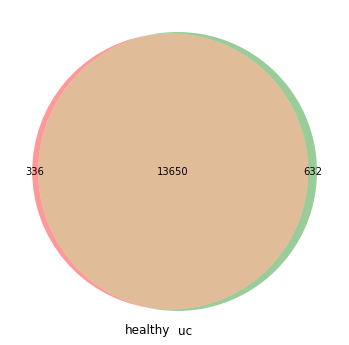

In [30]:
pylab.figure(figsize=(6,6))
ax = pylab.axes()
venn2([healthy,uc], ["healthy", "uc"])